In [ ]:
!pip install pandas

In [ ]:
#Load Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

**Data Description:**

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [ ]:
#Define file path
file_path = r"C:\Users\TANMAY\Downloads\Fraud.csv"

In [ ]:
#Load the dataset
df = pd.read_csv(file_path)

In [ ]:
#First Look of the Data
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# shape of the dataset
print(f"The Rows and Columns count is dataset: Rows ={df.shape[0]}, Columns ={df.shape[1]}")

The Rows and Columns count is dataset: Rows =6362620, Columns =11


In [ ]:
# check information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# description of the dataset
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
#describe character variables
df.describe(include = ['object'])

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [ ]:
# check for missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
# check for duplicated records
df.duplicated().sum()

0

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.to_list():
    print(f"The Number of Unique Values {i} : {df[i].nunique()}.")

The Number of Unique Values step : 743.
The Number of Unique Values type : 5.
The Number of Unique Values amount : 5316900.
The Number of Unique Values nameOrig : 6353307.
The Number of Unique Values oldbalanceOrg : 1845844.
The Number of Unique Values newbalanceOrig : 2682586.
The Number of Unique Values nameDest : 2722362.
The Number of Unique Values oldbalanceDest : 3614697.
The Number of Unique Values newbalanceDest : 3555499.
The Number of Unique Values isFraud : 2.
The Number of Unique Values isFlaggedFraud : 2.


In [ ]:
#check the datatypes of variables
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
# Handling Outliers & Outlier treatments
#select numerical columns
num_col = df.select_dtypes(include = ['int64','float64'])
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = num_col.quantile(0.25)
Q3 = num_col.quantile(0.75)
# Calculate the IQR
IQR = Q3 - Q1
# Determine the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#identify outliers
outliers_iqr = ((num_col < lower_bound) | (num_col > upper_bound)).any(axis=1)
print('Potential outliers using IQR method', outliers_iqr.sum())

Potential outliers using IQR method 2043214


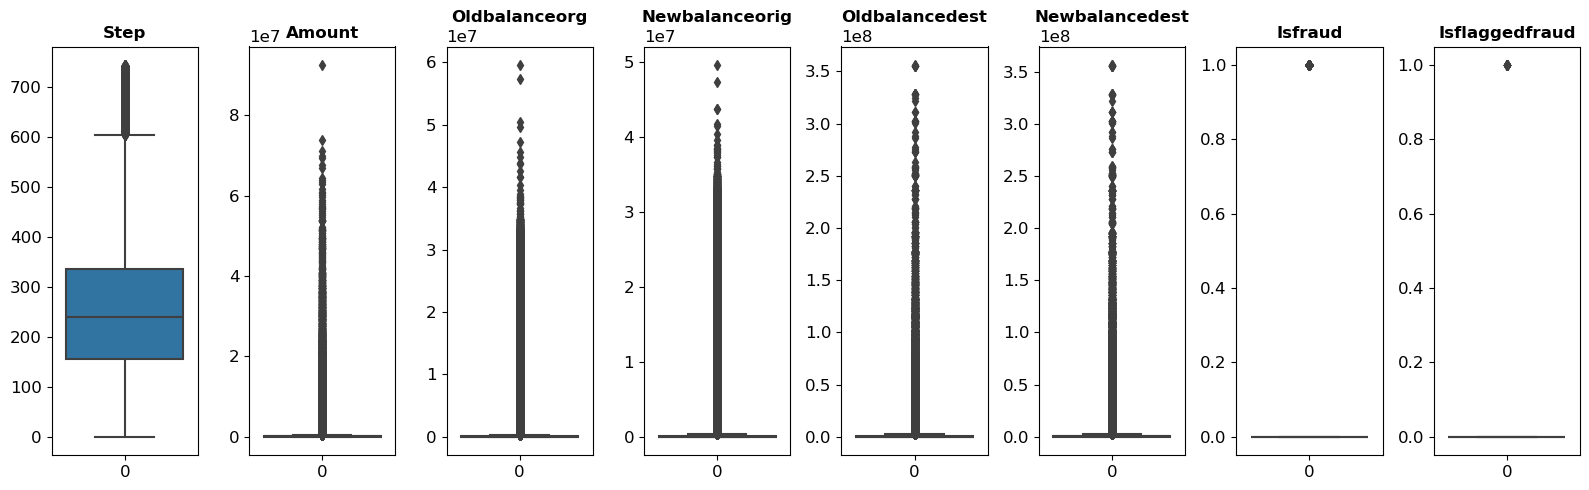

In [ ]:
# checking outliers with the help of box plot for numerical columns
plt.figure(figsize=(16,5))
for i, j in enumerate(num_col):
  plt.subplot(1, 8, i +1)
  sns.boxplot(df[j])
  plt.title(f'{j.title()}',weight='bold')
  plt.tight_layout()

In [ ]:
#we need to keep outliers because capping or removing outliers both tasks are affecting our target variable 'isFraud'

In [ ]:
#Permorning EDA

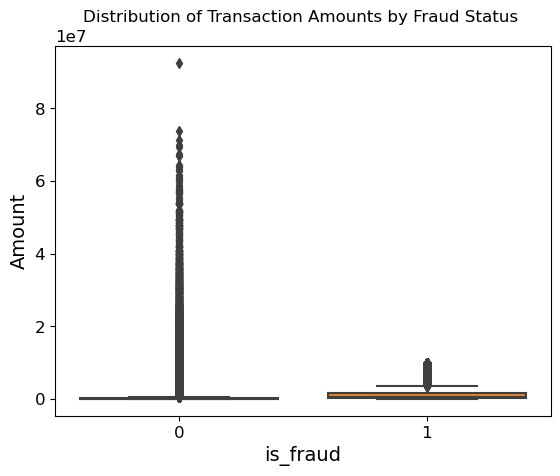

In [ ]:
#plot box chart to see distribution of fraud transactions across amount
sns.boxplot(x= 'isFraud', y = 'amount', data = df)
#define axes and show
plt.xlabel('is_fraud')
plt.ylabel('Amount')
plt.title('Distribution of Transaction Amounts by Fraud Status ')
plt.show()

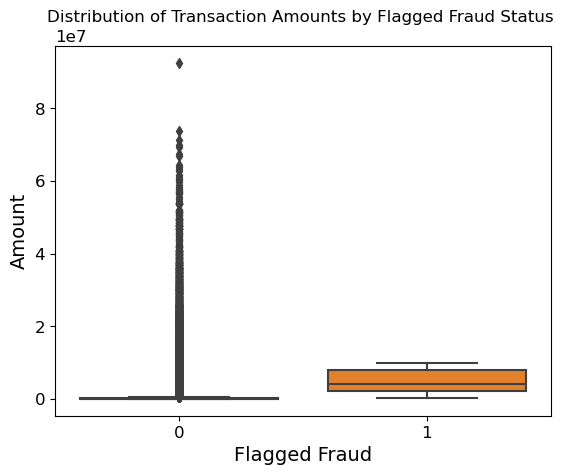

In [ ]:
#plot box chart to see distribution of flagged fraud transactions across amount
sns.boxplot(x= 'isFlaggedFraud', y = 'amount', data = df)
#define axes and show
plt.xlabel('Flagged Fraud')
plt.ylabel('Amount')
plt.title('Distribution of Transaction Amounts by Flagged Fraud Status ')
plt.show()

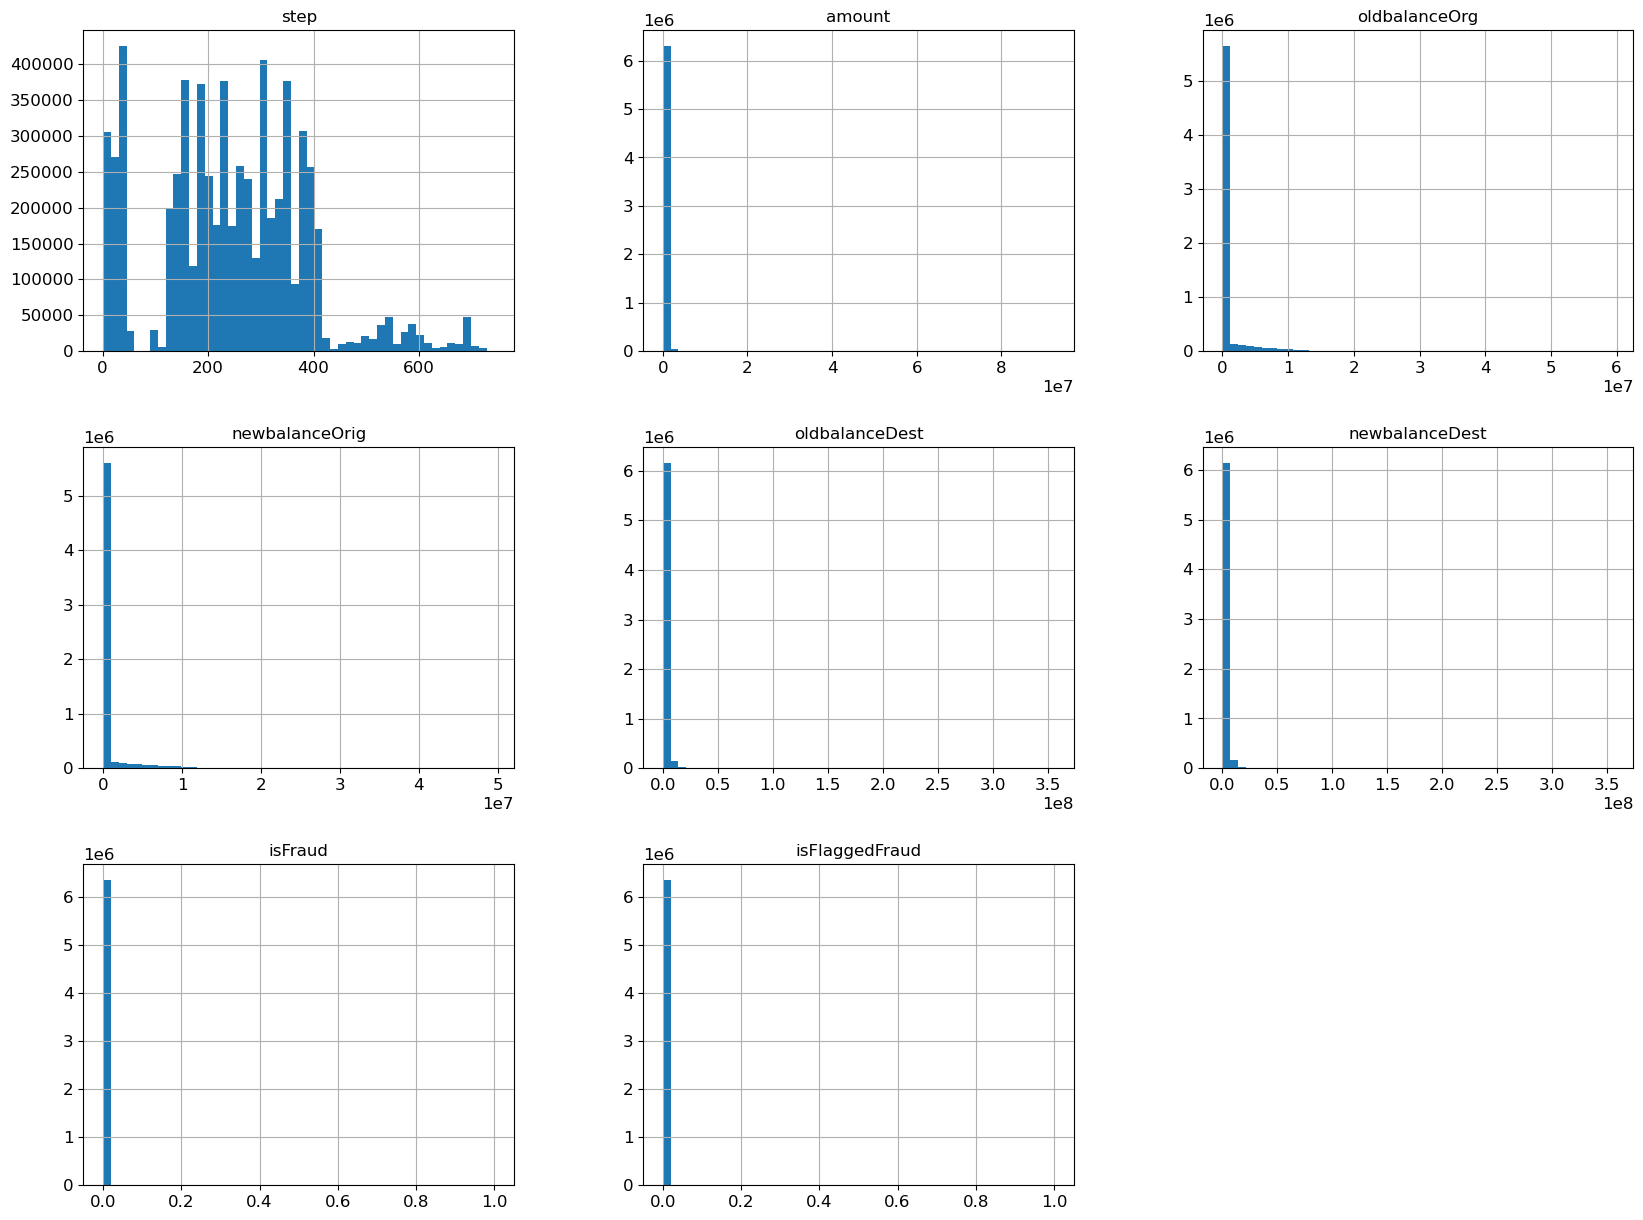

In [ ]:
#plot numerical columns
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
#we can see that data is highly skewed

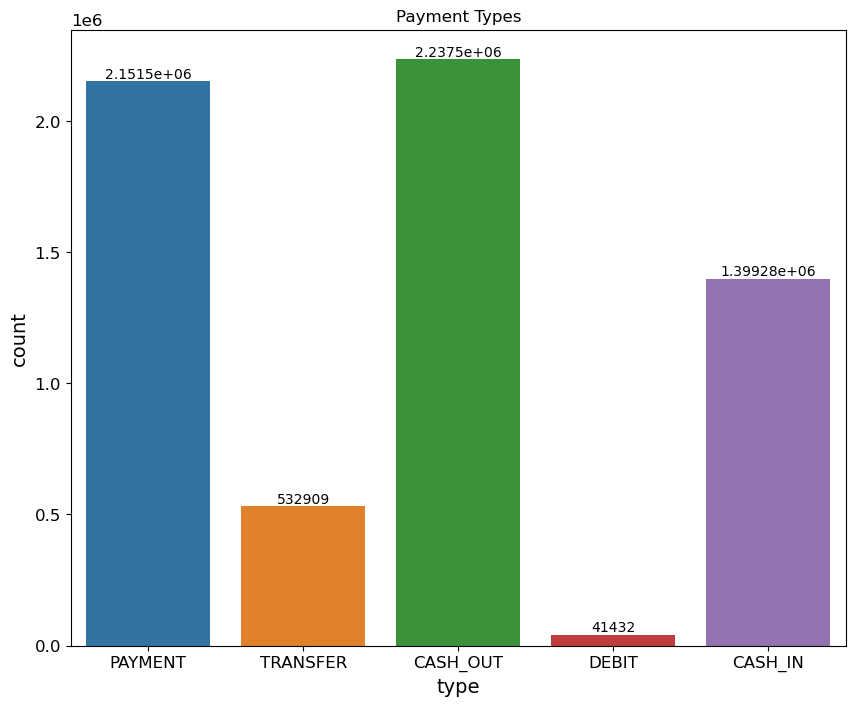

In [ ]:
# Analysis of categorical feature
plt.figure(figsize=(10,8))
ax = sns.countplot(x = 'type', data = df)
#iterating to find exact count using axis ax object
for bars in ax.containers:
    ax.bar_label(bars)
#add title and display
plt.title('Payment Types')
plt.show()

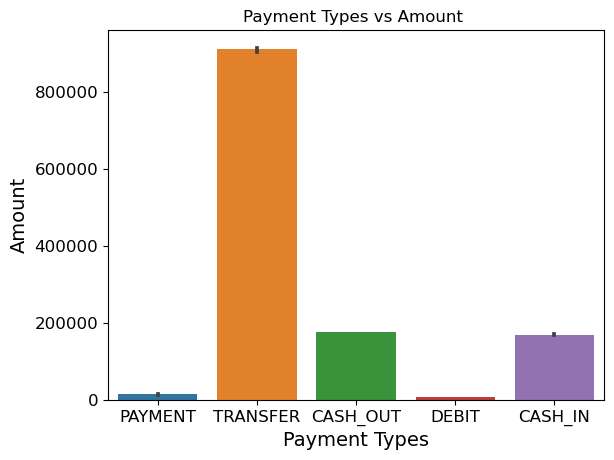

In [ ]:
#Plot chart for payment types vs amount
sns.barplot(x = 'type', y = 'amount', data = df)
#define axes and show
plt.xlabel('Payment Types')
plt.ylabel('Amount')
plt.title('Payment Types vs Amount ')
plt.show()

In [ ]:
# Calculate the correlation matrix
#separate numerical colum
numerical_df = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud']]
corr_matrix = numerical_df.corr()

In [ ]:
corr_matrix['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

In [ ]:
#variables in our data are not corelated

In [ ]:
#import libraries for model implementation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# Define the feature matrix and target vector
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']

# Identify categorical and numerical columns
categorical_cols = ['type']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Define the preprocessing steps for the categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])
# Create a pipeline that combines the preprocessing steps and the RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type']),
                                                 ('num', StandardScaler(),
                                                  ['step', 'amount',
                                                   'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'isFlaggedFraud'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
pipeline.classes_

array([0, 1], dtype=int64)

In [ ]:
# Make predictions
test_pred = pipeline.predict(X_test)

In [ ]:
#import necessary libraries for Evaluation of model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score, ConfusionMatrixDisplay,recall_score

In [ ]:
# Get the accuracy scores
test_accuracy = accuracy_score(y_test, test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9997034764504769


In [ ]:
_#precision scores
test_precision = precision_score(y_test, test_pred)
print("Test Precision:", test_precision)

Test Precision: 0.978005115089514


In [ ]:
# Calculate roc_auc score on test set
roc_aoc = roc_auc_score(y_test,test_pred)
print("roc_auc_score", roc_aoc)

roc_auc_score 0.8925965247837726


In [ ]:
#calculate recall score
test_recall = recall_score(y_test, test_pred)
print("Test Recall", test_recall)

Test Recall 0.7852156057494867


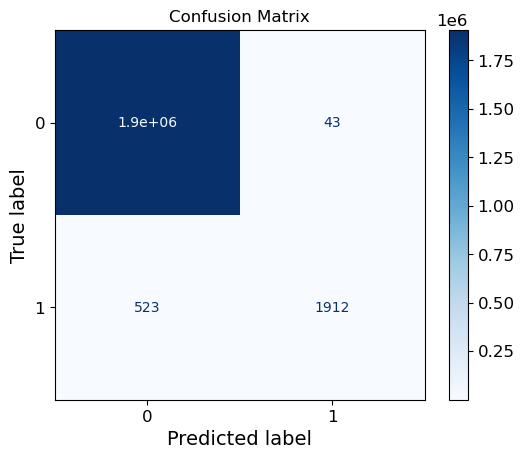

In [ ]:
#for test datset confusion matrix
cm_test = confusion_matrix(y_test, test_pred)

# Plot confusion matrix
#display the test confusion matrix
dist = ConfusionMatrixDisplay(confusion_matrix =cm_test, display_labels = pipeline.classes_)
dist.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

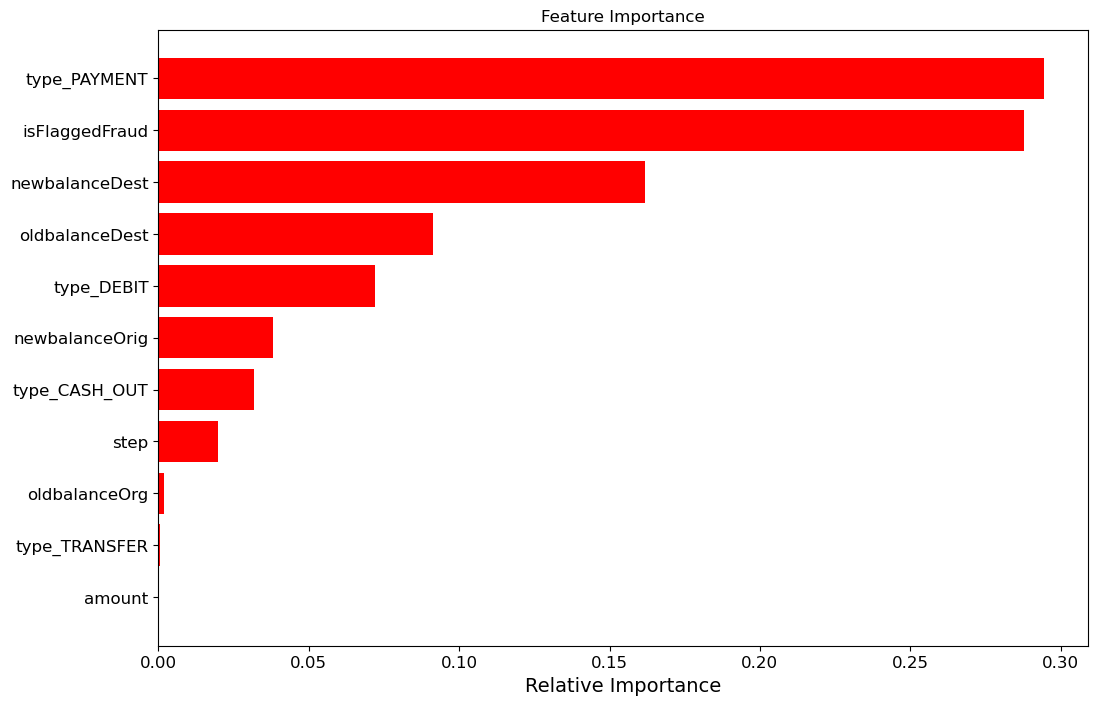

In [ ]:
# Extract feature importance
rf_classifier = pipeline.named_steps['classifier']
importances = rf_classifier.feature_importances_

# Get feature names
# Handle the transformation for OneHotEncoder
encoded_feature_names = list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols))
all_feature_names = numerical_cols + encoded_feature_names

# Get sorted indices
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [all_feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
#Payments appear to be a significant predictor, potentially indicating that fraudulent transactions are often disguised as payments.

In [ ]:
#Handle Imbalance in Dataset

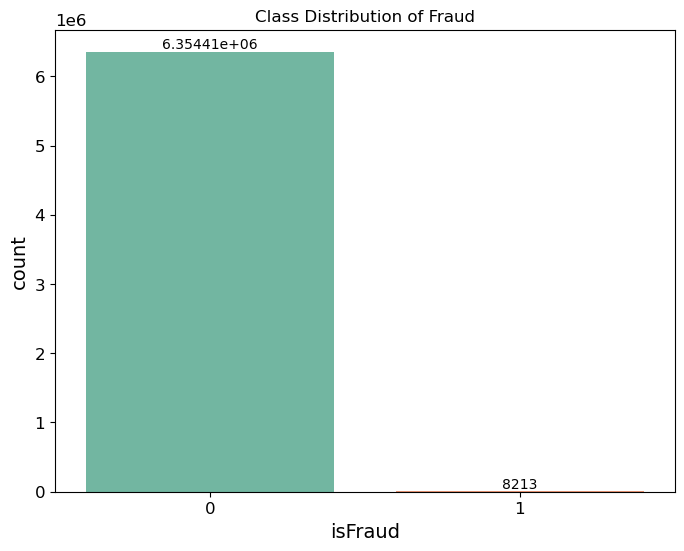

In [ ]:
#target variable analysis
plt.figure(figsize=(8,6))
ax = sns.countplot(x='isFraud', data = df, palette ='Set2')

#iterating to find exact count using axis ax object
for bars in ax.containers:
  ax.bar_label(bars)

#add title and display
plt.title('Class Distribution of Fraud')
plt.show()

In [ ]:
#We can see that dataset is highly imbalance which will lead to biased result to prevent this situation we will use data balancing techniques like SMOTE, Undersampling

In [ ]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imPipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

In [ ]:
#using SMOTE

In [ ]:
# Define the resampling and classification pipeline
pipeline_lr = imPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
pipeline_lr.fit(X_train, y_train)

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type']),
                                                 ('num', StandardScaler(),
                                                  ['step', 'amount',
                                                   'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'isFlaggedFraud'])])),
                ('sampler', SMOTE(random_state=42)),
                ('classifier', LogisticRegression(random_state=42))])

In [ ]:
# Predict on the test set
y_pred = pipeline_lr.predict(X_test)

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9473
Precision: 0.0233
ROC AUC: 0.9658
Recall: 0.9844
Confusion Matrix:
[[1805782  100569]
 [     38    2397]]


In [ ]:
#using UNDERSAMPLING

In [ ]:
# Define the resampling and classification pipeline
pipeline_lr = imPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', RandomUnderSampler(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type']),
                                                 ('num', StandardScaler(),
                                                  ['step', 'amount',
                                                   'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'isFlaggedFraud'])])),
                ('sampler', RandomUnderSampler(random_state=42)),
                ('classifier', LogisticRegression(random_state=42))])

In [ ]:
# Predict on the test set
y_rus_pred = pipeline_lr.predict(X_test)

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_rus_pred)
precision = precision_score(y_test, y_rus_pred)
roc_auc = roc_auc_score(y_test, y_rus_pred)
recall = recall_score(y_test, y_rus_pred)
conf_matrix = confusion_matrix(y_test, y_rus_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9319
Precision: 0.0170
ROC AUC: 0.9267
Recall: 0.9216
Confusion Matrix:
[[1776461  129890]
 [    191    2244]]


In [ ]:
#using SMOTEENN

In [ ]:
# Define the resampling and classification pipeline
pipeline_lr = imPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', SMOTEENN(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
pipeline_lr.fit(X_train, y_train)

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type']),
                                                 ('num', StandardScaler(),
                                                  ['step', 'amount',
                                                   'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'isFlaggedFraud'])])),
                ('sampler', SMOTEENN(random_state=42)),
                ('classifier', LogisticRegression(random_state=42))])

In [ ]:
# Predict on the test set
y_smt_pred = pipeline_lr.predict(X_test)

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_smt_pred)
precision = precision_score(y_test, y_smt_pred)
roc_auc = roc_auc_score(y_test, y_smt_pred)
recall = recall_score(y_test, y_smt_pred)
conf_matrix = confusion_matrix(y_test, y_smt_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9538
Precision: 0.0264
ROC AUC: 0.9672
Recall: 0.9807
Confusion Matrix:
[[1818206   88145]
 [     47    2388]]
